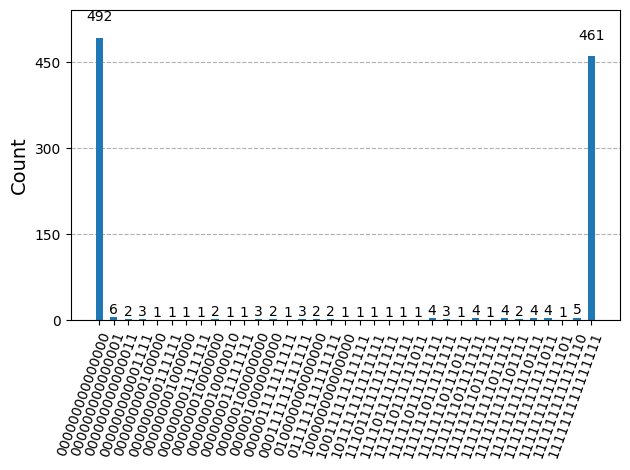

In [ ]:
#good example
import numpy as np
from matplotlib import pyplot as plt
# Import the qiskit library
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

from qiskit import ClassicalRegister
from IPython.display import display
# 追加: fidelity 検証用
from qiskit.quantum_info import DensityMatrix, partial_trace, state_fidelity
# Qiskitライブラリーを導入
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit import transpile
from qiskit.transpiler import CouplingMap
from qiskit.providers.fake_provider import GenericBackendV2
n = 15
qcn = QuantumCircuit(n)
qcn.h(0)
for i in range(n-1):
    qcn.cx(i, i+1)
qcn.draw(output="mpl")
edges = []
for i in range(n):
    j = (i + 1) % n
    edges.append((i, j))
    edges.append((j, i))
qcn.measure_all()
coupling_map = CouplingMap(edges)

backend_fake = GenericBackendV2(coupling_map=coupling_map, num_qubits=n)

# 擬似バックエンドでの実行に最適な回路にトランスパイルします
pm = generate_preset_pass_manager(backend=backend_fake, optimization_level=3)
isa_circuit = pm.run(qcn)
isa_circuit.draw("mpl", idle_wires=False)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend_fake)
job = sampler.run([isa_circuit]) # デフォルトのショット数は1024です

result = job.result()
plot_histogram(result[0].data.meas.get_counts())

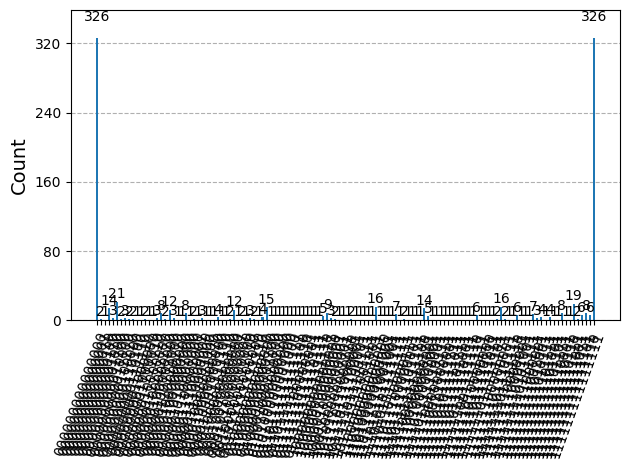

In [ ]:
#not good example
from matplotlib import pyplot as plt
# Import the qiskit library
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

from qiskit import ClassicalRegister
from IPython.display import display
# 追加: fidelity 検証用
from qiskit.quantum_info import DensityMatrix, partial_trace, state_fidelity
# Qiskitライブラリーを導入
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit import transpile
from qiskit.transpiler import CouplingMap
n = 15
qcn = QuantumCircuit(n)
qcn.h(0)
for i in range(14):
    qcn.cx(0, i+1)
qcn.measure_all()

from qiskit_ibm_runtime import fake_provider
backend_fake = fake_provider.FakeTorino()

# 擬似バックエンドでの実行に最適な回路にトランスパイルします
pm = generate_preset_pass_manager(backend=backend_fake, optimization_level=3)
isa_circuit = pm.run(qcn)
isa_circuit.draw("mpl", idle_wires=False)
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend_fake)
job = sampler.run([isa_circuit]) # デフォルトのショット数は1024です

result = job.result()
plot_histogram(result[0].data.meas.get_counts())